# CyberBullying Detection using NLP & Machine Learning

### 1. Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import  TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

### 2. Import Dataset

In [39]:
df_cyber = pd.read_csv("ExportedDatasetsNew/cyberbullying_final.csv")

### 3.  Check first 10 lines

In [40]:
df_cyber.head(10)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
5,bully flushes kd,0
6,turkish state killed children last years,0
7,love best response hotcakes managed film nonco...,0
8,twitter basically angry letters generation,0
9,best pick line hi youre cute love people call ...,0


### 4. Check Datasets type values and sum & drop duplicates

In [41]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61295 entries, 0 to 61294
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          61185 non-null  object
 1   cyberbullying_type  61295 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 957.9+ KB


In [42]:
df_cyber.shape

(61295, 2)

In [43]:
df_cyber.isnull().sum()

tweet_text            110
cyberbullying_type      0
dtype: int64

In [44]:
df_cyber = df_cyber.dropna()

In [45]:
df_cyber.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [46]:
df_cyber.tweet_text.duplicated().sum()

6793

In [47]:
df_cyber.duplicated(subset='tweet_text').sum()

6793

In [48]:
df_cyber.duplicated(subset=['tweet_text','cyberbullying_type']).sum()

4937

In [49]:
df_cyber = df_cyber.drop_duplicates()

In [50]:
df_cyber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56248 entries, 0 to 61294
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          56248 non-null  object
 1   cyberbullying_type  56248 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [51]:
df_cyber.to_csv("cyberplots.csv", index=False)

In [52]:
df_cyber['cyberbullying_type'].value_counts()

1    37710
0    18538
Name: cyberbullying_type, dtype: int64

In [53]:
# # Shuffling
# df_cyber = df_cyber.sample(frac=1)
# df_cyber.reset_index(inplace=True)
# df_cyber.drop(["index"], axis=1, inplace=True)

### 5. Graph of Dataset

[Text(0.5, 1.0, 'Graph of Dataset')]

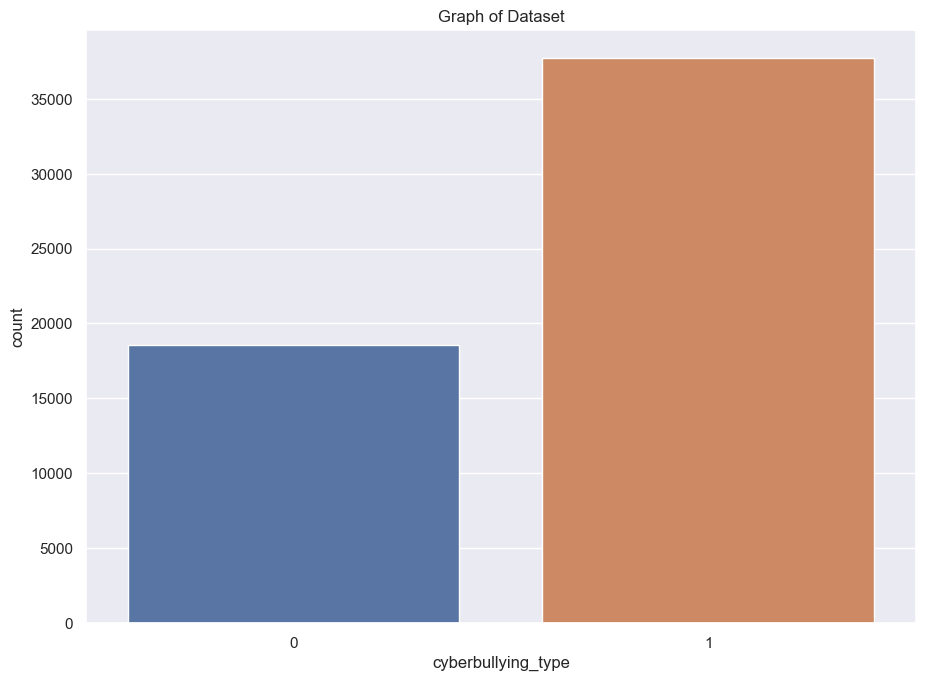

In [54]:
sns.set(rc={'figure.figsize':(10.7,7.7)})
sns.countplot(x='cyberbullying_type',data=df_cyber).set(title="Graph of Dataset")

### 7. Stopwords

In [55]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giann\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### 8. Data pre-processing

In [57]:
df_cyber.dropna(axis = 0)

,tweet_text,cyberbullying_type
0,classy whore red velvet cupcakes,0
1,meh p thanks heads concerned another angry dud...,0
2,yes test god good bad indifferent weird whatev...,0
3,karma hope bites kat butt nasty,0
4,rebecca black drops school due bullying,0
...,...,...
61288,loving credit crunch,0
61289,thats killing smile flattered,0
61291,agree awful makes sense regardless last mistak...,0
61292,called yesterday guidance counselors office th...,0


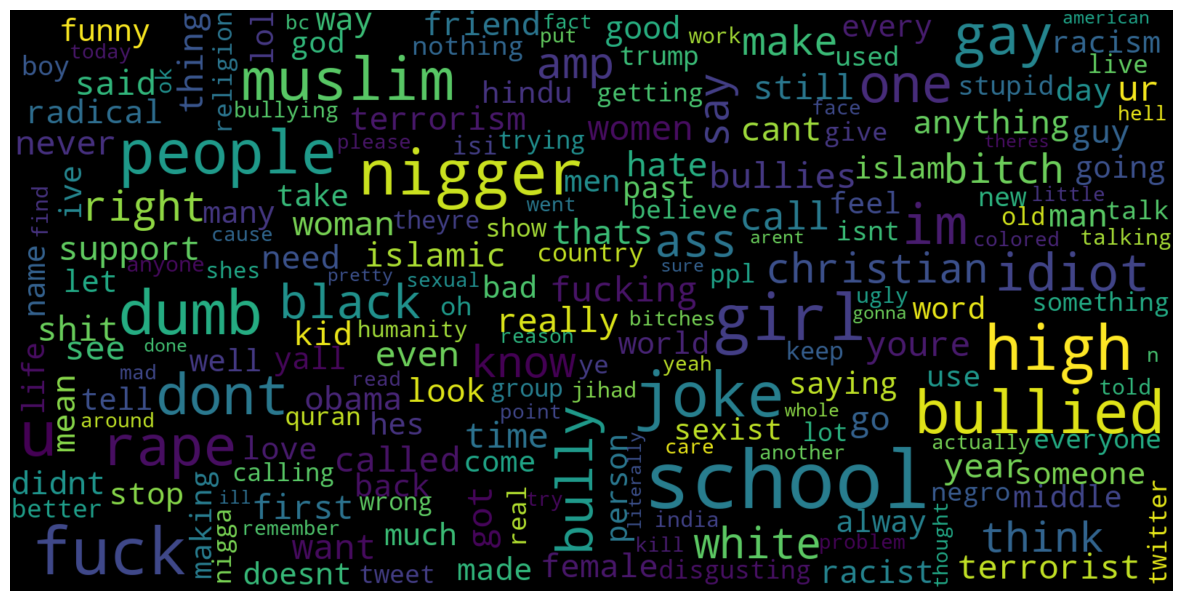

In [58]:
# Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

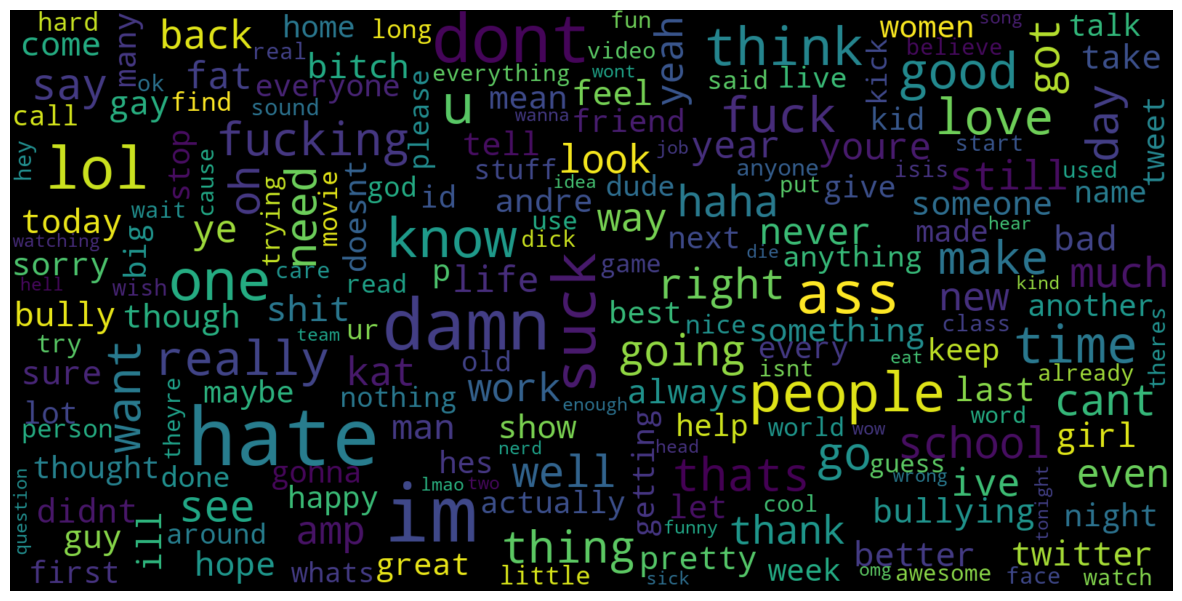

In [59]:
# Not Cyberbullying
consolidated = ' '.join(
    word for word in df_cyber['tweet_text'][df_cyber['cyberbullying_type'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

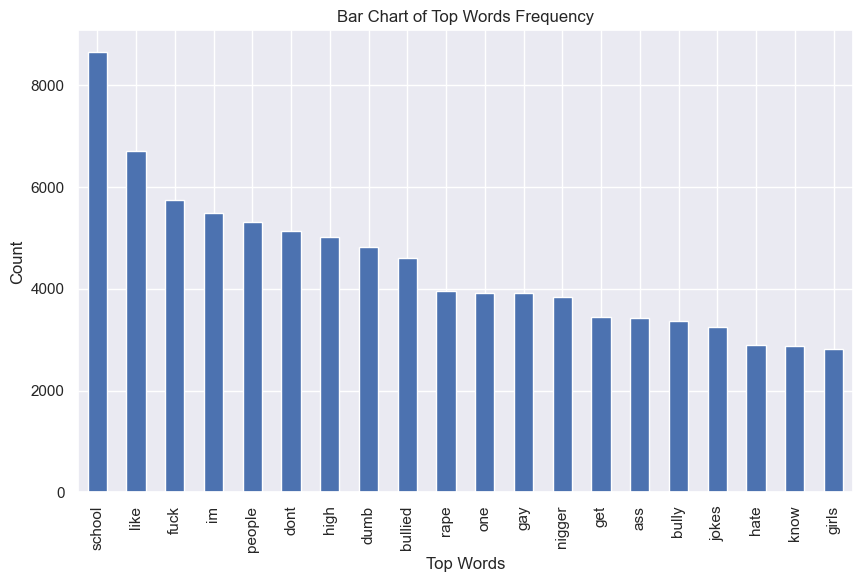

In [60]:

from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_cyber['tweet_text'].astype('U'), 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

### 11. Train/Test Splitting

In [61]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(df_cyber['tweet_text'],
                                                    df_cyber['cyberbullying_type'],
                                                    test_size=0.2,
                                                    random_state=42)

when random_state set to an integer, train_test_split will return same results for each execution.

when random_state set to an None, train_test_split will return different results for each execution.

In [62]:
x_train.shape

(44998,)

In [63]:
x_test.shape

(11250,)

In [64]:
y_train.shape

(44998,)

In [65]:
y_test.shape

(11250,)

### 10. Feature Extraction (Converting the textual data to numerical data)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [67]:
print(x_train)

  (0, 17551)	0.48581217515903496
  (0, 30682)	0.37544359141539224
  (0, 38296)	0.27107415838786275
  (0, 39534)	0.48931858051450355
  (0, 24603)	0.44987811377420134
  (0, 6953)	0.3282140312310079
  (1, 5825)	0.5111703258821336
  (1, 27430)	0.50359269042303
  (1, 2201)	0.5139279134812823
  (1, 9807)	0.47008233303839786
  (2, 37711)	0.34043303548075504
  (2, 3743)	0.2553458421221
  (2, 38526)	0.4643911920165264
  (2, 7076)	0.4773264855571806
  (2, 20964)	0.4773264855571806
  (2, 25915)	0.2670782544092307
  (2, 25977)	0.16822055908178446
  (2, 11267)	0.15816857685669736
  (2, 14396)	0.15138452111131678
  (3, 12391)	0.21487679266219592
  (3, 28512)	0.32093375948403763
  (3, 38817)	0.2698179628018836
  (3, 12331)	0.14050963415149045
  (3, 3655)	0.2504517898405347
  (3, 6728)	0.15012665499378516
  :	:
  (44995, 2312)	0.2262697677716927
  (44995, 25977)	0.21636011400960586
  (44995, 11267)	0.20343156334901136
  (44995, 14396)	0.19470611930976964
  (44996, 21396)	0.5200358631193114
  (44996, 1

In [68]:
print(x_test)

  (0, 34985)	0.7636043132899001
  (0, 4425)	0.6456844838812993
  (1, 38318)	0.12628205958697128
  (1, 38058)	0.2693691285521305
  (1, 36590)	0.2581436711026912
  (1, 35397)	0.19495994123007954
  (1, 33440)	0.09096481371194855
  (1, 32087)	0.30290623610216366
  (1, 27247)	0.21858765527486435
  (1, 24974)	0.14797746656968666
  (1, 24569)	0.19199658815506512
  (1, 23891)	0.2905286875541724
  (1, 23648)	0.18917277211627692
  (1, 20763)	0.16283823643900575
  (1, 17343)	0.20011350060496383
  (1, 17145)	0.10523989641288121
  (1, 16774)	0.18199532091895415
  (1, 15232)	0.12435978775734266
  (1, 12331)	0.13505365667205183
  (1, 11532)	0.279303230104733
  (1, 10855)	0.10686644455937187
  (1, 9234)	0.21329092349452988
  (1, 8958)	0.2581436711026912
  (1, 8206)	0.22500046309320312
  (1, 5328)	0.2677186297971321
  :	:
  (11245, 14430)	0.2367079311426326
  (11245, 5353)	0.28667514982792813
  (11246, 41391)	0.42725966063967863
  (11246, 39434)	0.37889051089562004
  (11246, 33440)	0.19889482610377088


### Logistic Regression (LR)

In [69]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8920174229965776
0.8457777777777777


C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      3679
           1       0.89      0.88      0.89      7571

    accuracy                           0.85     11250
   macro avg       0.82      0.83      0.83     11250
weighted avg       0.85      0.85      0.85     11250



### Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9733099248855505
0.8003555555555556


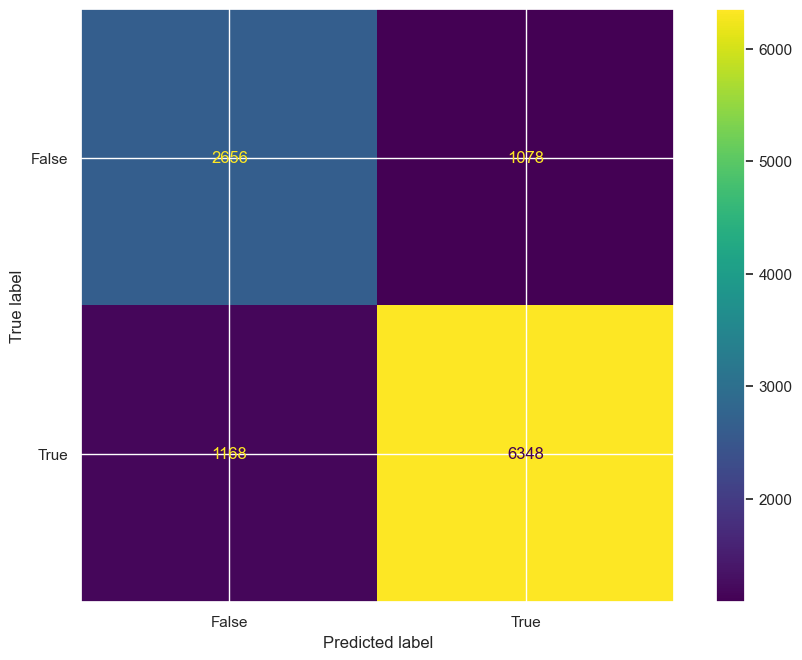

In [72]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [73]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70      3824
           1       0.84      0.85      0.85      7426

    accuracy                           0.80     11250
   macro avg       0.78      0.77      0.78     11250
weighted avg       0.80      0.80      0.80     11250



### Random Forest

In [74]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators = number of decision trees
model = RandomForestClassifier(n_estimators=30)
model.fit(x_train, y_train)
# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9729543535268235
0.8177777777777778


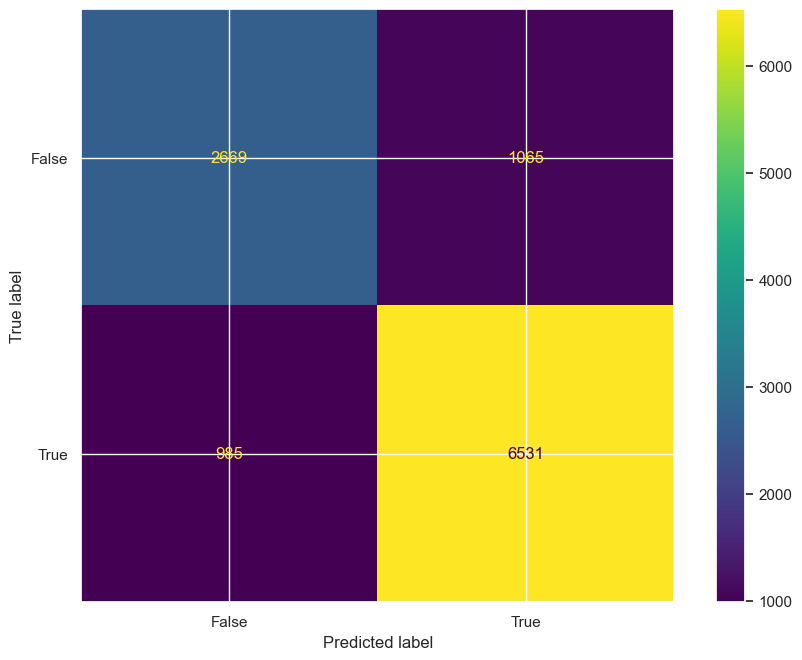

In [75]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [76]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      3654
           1       0.87      0.86      0.86      7596

    accuracy                           0.82     11250
   macro avg       0.79      0.80      0.79     11250
weighted avg       0.82      0.82      0.82     11250



### XGBoost

In [77]:
import xgboost as xgb

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train,y_train)

C:\Users\giann\DataspellProjects\CBDA\venv\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8621049824436642
0.8450666666666666


In [79]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      4659
           1       0.82      0.94      0.88      6591

    accuracy                           0.85     11250
   macro avg       0.86      0.83      0.83     11250
weighted avg       0.85      0.85      0.84     11250



### Multinomial Naive Bayes

In [80]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.8127916796302058
0.7490666666666667


In [81]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.29      0.86      0.44      1269
           1       0.98      0.74      0.84      9981

    accuracy                           0.75     11250
   macro avg       0.63      0.80      0.64     11250
weighted avg       0.90      0.75      0.79     11250



### Support Vector Machine

In [82]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9153295702031201
0.8472888888888889


In [83]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77      3850
           1       0.88      0.89      0.88      7400

    accuracy                           0.85     11250
   macro avg       0.83      0.83      0.83     11250
weighted avg       0.85      0.85      0.85     11250



### K-Nearest Neighbours

In [84]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(algorithm = 'brute', n_jobs=-1)

model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9511978310147118
0.6826666666666666


In [85]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.60      0.52      0.56      4300
           1       0.72      0.78      0.75      6950

    accuracy                           0.68     11250
   macro avg       0.66      0.65      0.65     11250
weighted avg       0.68      0.68      0.68     11250



### Bagging Decision Tree (Ensemble Learning I)

In [86]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.7,max_features=1.0,n_estimators=30)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9596204275745589
0.8269333333333333


In [87]:
print(classification_report( model.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      3851
           1       0.86      0.88      0.87      7399

    accuracy                           0.83     11250
   macro avg       0.81      0.80      0.81     11250
weighted avg       0.83      0.83      0.83     11250



### Boosting Decision Tree (Ensemble Learning II)

In [88]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K
# n_estimators: number of decision trees
model=AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=5000,learning_rate=0.6)
model.fit(x_train, y_train)
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

KeyboardInterrupt: 

In [ ]:
print(classification_report( model.predict(x_test),y_test))